In [6]:
import re
import pandas as pd
import numpy as np
from datetime import datetime

from core.Enums import MissValueStrategy
from processor.PreProcessor import PreProcessor
from visualization.VisualOperations import VisualOperations

In [8]:
print("Reading Document ...")
dataArr = pd.read_csv("../files/raw/online store customer.csv")
## Level 1 of Project
processor = PreProcessor(dataArr)
processor.changeColumnNames([("Gender", "Sex")])
processor.changeDataTypes([("Transaction_date", "datetime64[ns]")])
processor.fillMissValues(
    [("Sex", MissValueStrategy.MODE), ("Amount_spent", MissValueStrategy.MEAN),
     ("Employees_status", MissValueStrategy.MODE), ("Age", MissValueStrategy.MEDIAN)])
result = dataArr[['Employees_status', 'Amount_spent']].groupby(['Employees_status']).agg(
    ['mean'])
print(result)


Reading Document ...
                 Amount_spent
                         mean
Employees_status             
Employees         1433.319266
Unemployment      1360.936618
self-employed     1456.565709
workers           1395.369485


In [ ]:
## Data Cleaning Visualization

<Axes: xlabel='year'>

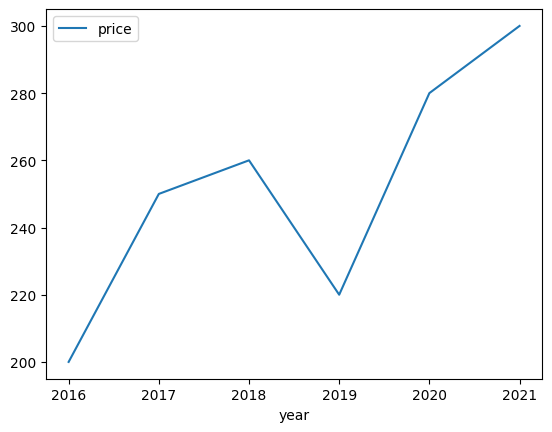

In [9]:
visualOperation = VisualOperations()
dict_line = {
    'year': [2016, 2017, 2018, 2019, 2020, 2021],
    'price': [200, 250, 260, 220, 280, 300]
}
df_line = pd.DataFrame(dict_line)
df_line.plot('year', 'price')